In [4]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [3]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# 가중치 행렬입니다
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# 편향 벡터입니다
b = tf.Variable(tf.zeros(shape=(output_dim,)))

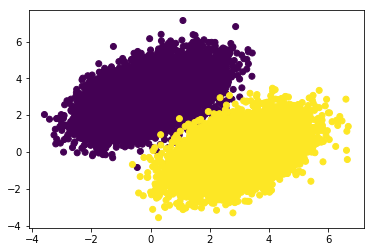

In [5]:
# 데이터셋을 준비합니다
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [6]:
# 데이터를 무작위로 섞습니다
random.Random(1337).shuffle(features)
random.Random(1337).shuffle(labels)

# 손쉽게 배치화된 반복을 위해, tf.data.Dataset 객체를 생성합니다
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: 마지막 배치의 손실값 = %.4f' % (epoch, float(loss)))

Epoch 0: 마지막 배치의 손실값 = 0.0707
Epoch 1: 마지막 배치의 손실값 = 0.0735
Epoch 2: 마지막 배치의 손실값 = 0.0361
Epoch 3: 마지막 배치의 손실값 = 0.0248
Epoch 4: 마지막 배치의 손실값 = 0.0229
Epoch 5: 마지막 배치의 손실값 = 0.0348
Epoch 6: 마지막 배치의 손실값 = 0.0281
Epoch 7: 마지막 배치의 손실값 = 0.0271
Epoch 8: 마지막 배치의 손실값 = 0.0285
Epoch 9: 마지막 배치의 손실값 = 0.0188


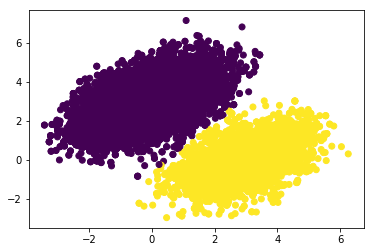

In [7]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

In [8]:
#tf.function를 이용해서 속도를 빠르게 하기 
import time

In [13]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('epoch당 걸린 시간: %.3f 초' % (t_end / 20,))

epoch당 걸린 시간: 0.072 초
